In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree._tree import TREE_LEAF
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
from sklearn import tree

%matplotlib inline

In [2]:
#process input as pandas dataframe
def process_input():
    df = pd.read_csv("AggregatedCountriesCOVIDStats.csv")
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce') #converting date to a pandas datetime format
    df['Date_month'] = df['Date'].dt.month #extracting month from date
    #df['Date_day'] = df['Date'].dt.day   #Can extract day from date but this doesn't help accuracy
    del df["Date"]      #deleting date column, will keep only month as feature
    #df['Country'] = pd.Categorical(df['Country'])  #use categorical variable for countries
    #df['Country_code'] = df['Country'].cat.codes   #map each country to numerical code
    ohe = pd.get_dummies(df['Country'],prefix='Country')   #use one hot encoding for countries
    df = df.join(ohe)
    del df["Country"]  #deleting country column since we dealt with it via above
    new_deaths = df['Deaths']
    del df['Deaths']
    df = df.join(new_deaths)      #make number of deaths the last column
    df_train, df_test = train_test_split(df,test_size=0.2)   #create random 80-20 split of data
    df2 = df_train.reset_index(drop=True)   #reset indices to start from 0
    df3 = df_test.reset_index(drop=True)
    X_train = df2.iloc[:, :-1]   #input is every column except last
    y_train = df2.iloc[:, -1]    #output is last column
    X_test = df3.iloc[:, :-1]
    y_test = df3.iloc[:, -1]

    return X_train,X_test,y_train,y_test

In [3]:
regr = DecisionTreeRegressor(max_depth=10)

In [4]:
X_train, X_test, y_train, y_test = process_input()

In [5]:
path = regr.cost_complexity_pruning_path(X_train, y_train)

In [6]:
path

{'ccp_alphas': array([0.00000000e+00, 8.36212654e-03, 9.81388461e-03, 1.06854925e-02,
        1.94227487e-02, 3.20693360e-02, 3.55680729e-02, 3.57906758e-02,
        3.91974681e-02, 4.04592219e-02, 4.55271334e-02, 4.88371418e-02,
        5.58055806e-02, 5.78650669e-02, 6.37655701e-02, 6.91182021e-02,
        8.05977718e-02, 8.16613919e-02, 8.38535466e-02, 8.45119189e-02,
        8.85436213e-02, 9.06042217e-02, 9.29125171e-02, 1.05611667e-01,
        1.07372028e-01, 1.07372028e-01, 1.21102433e-01, 1.22339653e-01,
        1.25562556e-01, 1.25562556e-01, 1.39426846e-01, 1.49898861e-01,
        1.54017015e-01, 1.85374989e-01, 1.86996119e-01, 1.94201678e-01,
        1.98731163e-01, 2.12551900e-01, 2.23222322e-01, 2.27658895e-01,
        2.31154314e-01, 2.36351054e-01, 2.43927065e-01, 2.62711110e-01,
        2.66697638e-01, 2.67244466e-01, 2.67860409e-01, 2.68839553e-01,
        2.71865896e-01, 2.82543277e-01, 2.93262391e-01, 3.01036555e-01,
        3.09456752e-01, 3.17071223e-01, 3.19991677

In [7]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0, 0.5, 'Total Impurity of Leaves')

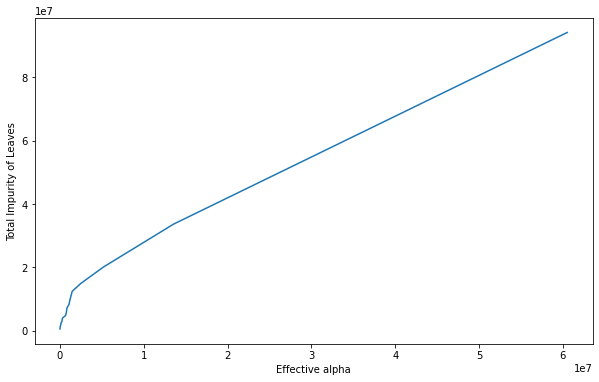

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Effective alpha")
plt.ylabel("Total Impurity of Leaves")

In [9]:
regrs = []

for ccp_alpha in ccp_alphas:
    regr = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha, max_depth=10)
    regr.fit(X_train, y_train)
    regrs.append(regr)

Text(0, 0.5, 'Total Depth')

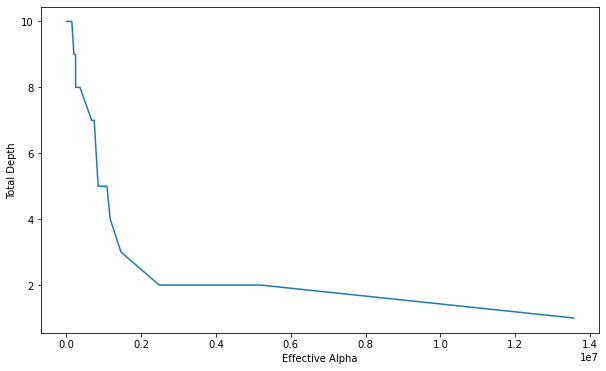

In [10]:
# How depth changes alpha
tree_depths = [regr.tree_.max_depth for regr in regrs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("Effective Alpha")
plt.ylabel("Total Depth")

In [11]:
acc_scores = [r2_score(y_test, regr.predict(X_test)) for regr in regrs]

Text(0, 0.5, 'R2 scores')

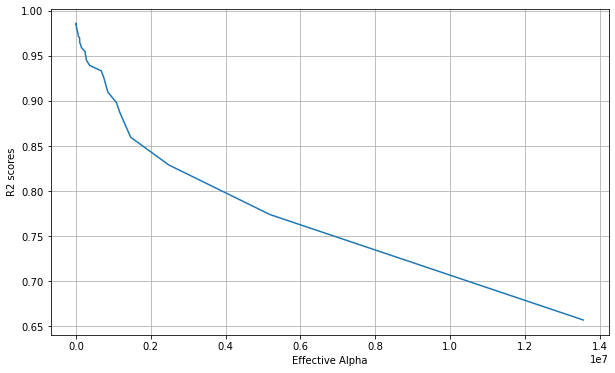

In [12]:
tree_depths = [regr.tree_.max_depth for regr in regrs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("Effective Alpha")
plt.ylabel("R2 scores")